In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/tabular-playground-series-apr-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-apr-2022/train_labels.csv
/kaggle/input/tabular-playground-series-apr-2022/train.csv
/kaggle/input/tabular-playground-series-apr-2022/test.csv


# Tabular Playground Series - Apr 2022

# Exploratory Data Analysis


<h2>Train dataset</h2>

Lets first explore the train dataset and subsequently the test dataset.

In [2]:
train_df = pd.read_csv('/kaggle/input/tabular-playground-series-apr-2022/train.csv')
labels_df = pd.read_csv('/kaggle/input/tabular-playground-series-apr-2022/train_labels.csv')

In [3]:
train_df.shape

(1558080, 16)

In [4]:
train_df.head()

,sequence,subject,step,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12
0,0,47,0,-0.196291,0.112395,1.0,0.329204,-1.004660,-0.131638,-0.127505,0.368702,-0.1,-0.963873,-0.985069,0.531893,4.751492
1,0,47,1,-0.447450,0.134454,1.0,-0.658407,0.162495,0.340314,-0.209472,-0.867176,0.2,-0.301301,0.082733,-0.231481,0.454390
2,0,47,2,0.326893,-0.694328,1.0,0.330088,0.473678,1.280479,-0.094718,0.535878,1.4,1.002168,0.449221,-0.586420,-4.736147
3,0,47,3,0.523184,0.751050,1.0,0.976991,-0.563287,-0.720269,0.793260,0.951145,-0.3,-0.995665,-0.434290,1.344650,0.429241
4,0,47,4,0.272025,1.074580,1.0,-0.136283,0.398579,0.044877,0.560109,-0.541985,-0.9,1.055636,0.812631,0.123457,-0.223359


In [5]:
train_df.tail()

,sequence,subject,step,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12
1558075,25967,327,55,-0.282844,-1.217437,-1.666153,0.586726,-0.930698,-0.451010,-0.651184,0.368702,0.4,0.008671,-0.723536,-0.353909,-0.914749
1558076,25967,327,56,0.130603,0.349790,-1.666153,-0.324779,0.775324,-0.332835,0.099271,0.122137,-0.2,0.644509,0.691407,-0.613169,-0.515772
1558077,25967,327,57,-0.579598,0.429622,-1.666153,0.319469,0.308861,0.282723,-0.512750,0.012214,-1.6,-0.424133,0.716855,1.628601,0.928389
1558078,25967,327,58,1.278980,1.711134,-1.522820,0.802655,-0.460541,-0.055348,2.405282,0.043511,1.9,0.283960,-0.914914,0.364198,0.211424
1558079,25967,327,59,-1.136012,-3.702731,-1.332820,-0.766372,-0.430027,-0.091997,-2.512750,-0.022901,-1.1,-0.653902,-0.418516,-1.453704,-1.561381


<h2>1. Structure Investigation</h2>

In [6]:
pd.value_counts(train_df.dtypes)

float64    13
int64       3
dtype: int64

<h2>1.1. Structure of numerical features</h2>

In [7]:
train_df.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
sequence,1558080.0,12983.500000,7496.318295,0.000000,6491.750000,12983.500000,19475.250000,25967.000000
subject,1558080.0,331.633087,195.825657,0.000000,161.750000,335.000000,501.000000,671.000000
step,1558080.0,29.500000,17.318108,0.000000,14.750000,29.500000,44.250000,59.000000
sensor_00,1558080.0,0.000437,2.658684,-375.063369,-0.500000,-0.003091,0.484544,335.824575
sensor_01,1558080.0,-0.001035,4.404200,-434.597689,-0.483193,0.003151,0.492647,449.591387
sensor_02,1558080.0,-0.217805,2.298002,-31.659476,-0.646153,0.000000,0.333847,1.666667
sensor_03,1558080.0,-0.002157,3.934184,-408.376106,-0.492920,0.000000,0.489381,436.650442
sensor_04,1558080.0,-0.001829,1.683685,-23.626013,-0.472993,-0.001590,0.470156,24.872865
sensor_05,1558080.0,-0.001652,1.590818,-74.982797,-0.478684,0.002992,0.505610,77.915482
sensor_06,1558080.0,-0.000412,3.345143,-470.504554,-0.492714,0.000911,0.492714,442.500911


<AxesSubplot:title={'center':'Unique Values per feature'}>

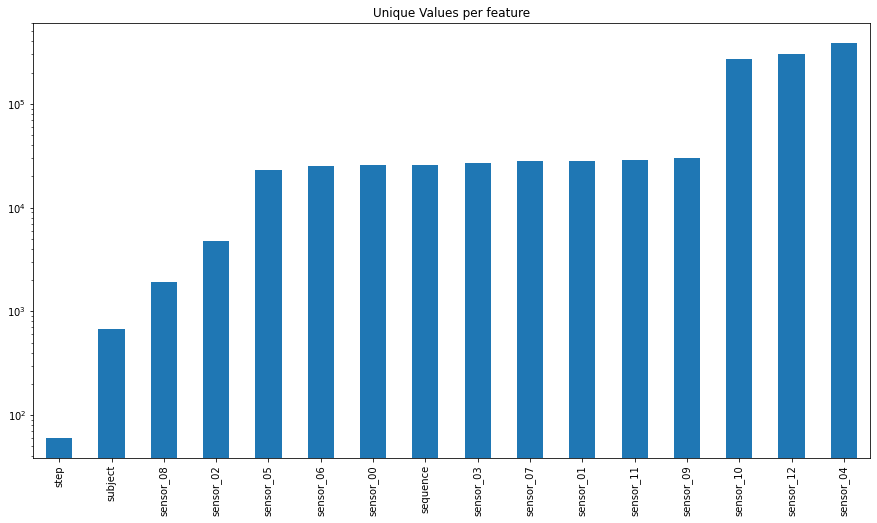

In [8]:
unique_values = train_df.select_dtypes(include='number').nunique().sort_values()

unique_values.plot.bar(logy=True, figsize=(15, 8), title='Unique Values per feature')

# 1.3. Conclusion of structure investigation

The dataset being explored has 16 features to deal with and a lot of samples roughly 1mi without any missing value. There are 3 features of type int64 and 13 of type float64. 

<h2>2. Quality Investigation</h2>

<h3>2.1. Duplicates</h3>

In [9]:
n_duplicates = train_df.duplicated().sum()
print(f"There are {n_duplicates} duplicates samples.")

There are 0 duplicates samples.


<h3>2.2. Missing values</h3>

In [10]:
missing = train_df.isnull().sum()
print(f"Missing values per feature: {missing}")

Missing values per feature: sequence     0
subject      0
step         0
sensor_00    0
sensor_01    0
sensor_02    0
sensor_03    0
sensor_04    0
sensor_05    0
sensor_06    0
sensor_07    0
sensor_08    0
sensor_09    0
sensor_10    0
sensor_11    0
sensor_12    0
dtype: int64


<h2>3. Content Investigation</h2>

<h3>3.1. Feature distribution</h3>

array([[<AxesSubplot:title={'center':'sequence'}>,
        <AxesSubplot:title={'center':'subject'}>,
        <AxesSubplot:title={'center':'step'}>,
        <AxesSubplot:title={'center':'sensor_00'}>,
        <AxesSubplot:title={'center':'sensor_01'}>],
       [<AxesSubplot:title={'center':'sensor_02'}>,
        <AxesSubplot:title={'center':'sensor_03'}>,
        <AxesSubplot:title={'center':'sensor_04'}>,
        <AxesSubplot:title={'center':'sensor_05'}>,
        <AxesSubplot:title={'center':'sensor_06'}>],
       [<AxesSubplot:title={'center':'sensor_07'}>,
        <AxesSubplot:title={'center':'sensor_08'}>,
        <AxesSubplot:title={'center':'sensor_09'}>,
        <AxesSubplot:title={'center':'sensor_10'}>,
        <AxesSubplot:title={'center':'sensor_11'}>],
       [<AxesSubplot:title={'center':'sensor_12'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

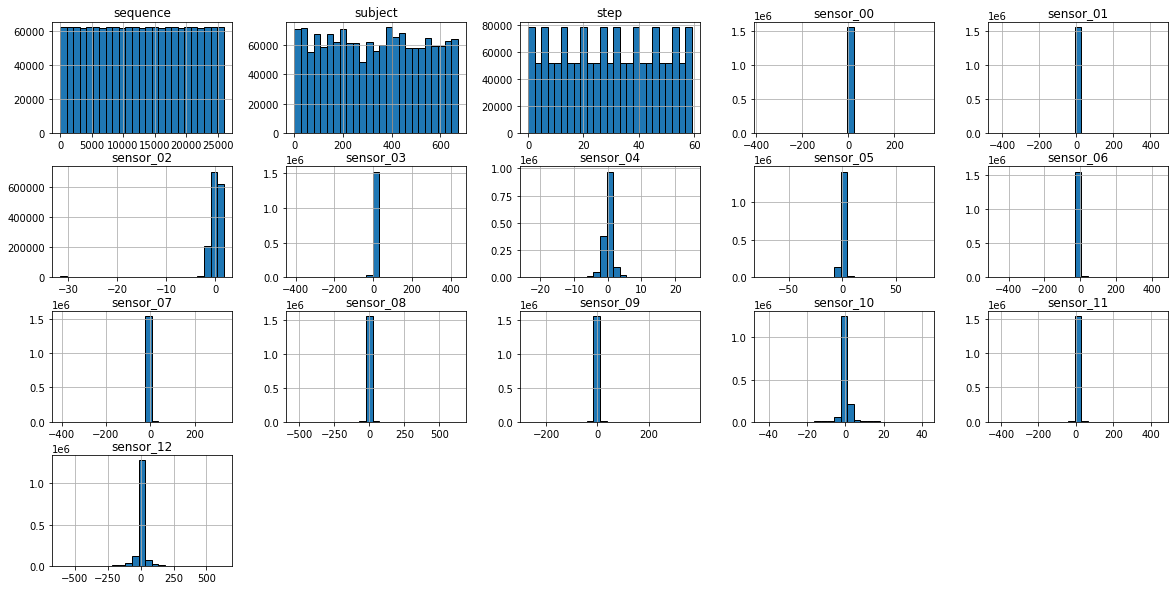

In [11]:
train_df.hist(bins=25, figsize=(20, 10), layout=(-1, 5), edgecolor='black')

<h3>3.2. Feature patterns</h3>

array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

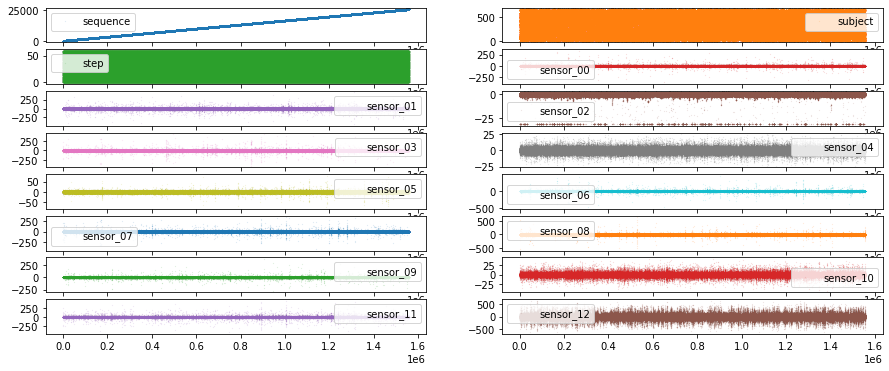

In [12]:
train_df.plot(lw=0, marker=".", subplots=True, layout=(-1, 2), markersize=0.1, figsize=(15, 6))

<h3>3.3. Feature Relationship</h3>

<AxesSubplot:>

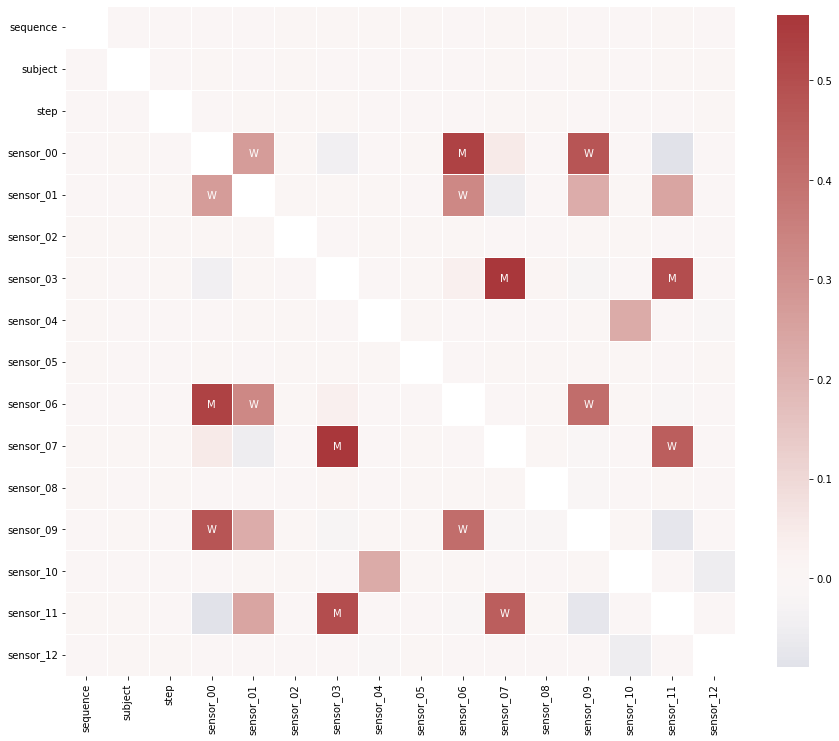

In [13]:
df_corr = train_df.corr(method="pearson")

# Create labels for the correlation matrix
labels = np.where(np.abs(df_corr)>0.75, "S",
                  np.where(np.abs(df_corr)>0.5, "M",
                           np.where(np.abs(df_corr)>0.25, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(15, 15))

sns.heatmap(df_corr, mask=np.eye(len(df_corr)),
            square=True,
            center=0,
            annot=labels,
            fmt='',
            linewidths=0.5,
            cmap="vlag",
            cbar_kws={"shrink": 0.8}
           )

# Labels Data

In [14]:
labels_df.head()

,sequence,state
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1


In [15]:
labels_df.tail()

,sequence,state
25963,25963,1
25964,25964,0
25965,25965,1
25966,25966,1
25967,25967,0


In [16]:
labels_df.shape

(25968, 2)

In [17]:
labels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25968 entries, 0 to 25967
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   sequence  25968 non-null  int64
 1   state     25968 non-null  int64
dtypes: int64(2)
memory usage: 405.9 KB


In [18]:
labels_df.nunique()

sequence    25968
state           2
dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='state', ylabel='count'>

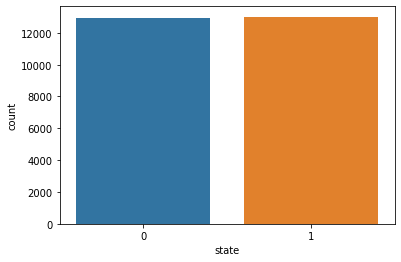

In [19]:
sns.countplot(labels_df.state)

# Test Dataset

In [20]:
test_df = pd.read_csv('/kaggle/input/tabular-playground-series-apr-2022/test.csv')

In [21]:
test_df.shape

(733080, 16)

<h2>1. Structure Investigation</h2>

In [22]:
pd.value_counts(test_df.dtypes)

float64    13
int64       3
dtype: int64

<h2>1.1. Structure of numerical features</h2>

In [23]:
test_df.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
sequence,733080.0,32076.500000,3527.035188,25968.000000,29022.000000,32076.500000,35131.000000,38185.000000
subject,733080.0,829.363971,92.611544,672.000000,750.000000,833.000000,909.000000,990.000000
step,733080.0,29.500000,17.318114,0.000000,14.750000,29.500000,44.250000,59.000000
sensor_00,733080.0,0.000208,2.927126,-347.382535,-0.497682,-0.003864,0.480680,403.787481
sensor_01,733080.0,-0.001046,4.595209,-457.260504,-0.483193,0.002101,0.491597,551.537815
sensor_02,733080.0,-0.218273,2.336926,-31.659476,-0.581153,0.000000,0.333847,1.666667
sensor_03,733080.0,-0.002449,4.883734,-425.277876,-0.487611,0.001770,0.484071,498.469027
sensor_04,733080.0,-0.000155,1.880884,-24.754551,-0.524358,0.000421,0.524701,24.541828
sensor_05,733080.0,-0.001913,1.625182,-55.135378,-0.513837,-0.000748,0.529544,62.824233
sensor_06,733080.0,-0.001709,3.423139,-435.773224,-0.489071,0.001821,0.485428,484.381603


<AxesSubplot:title={'center':'Unique Values per feature'}>

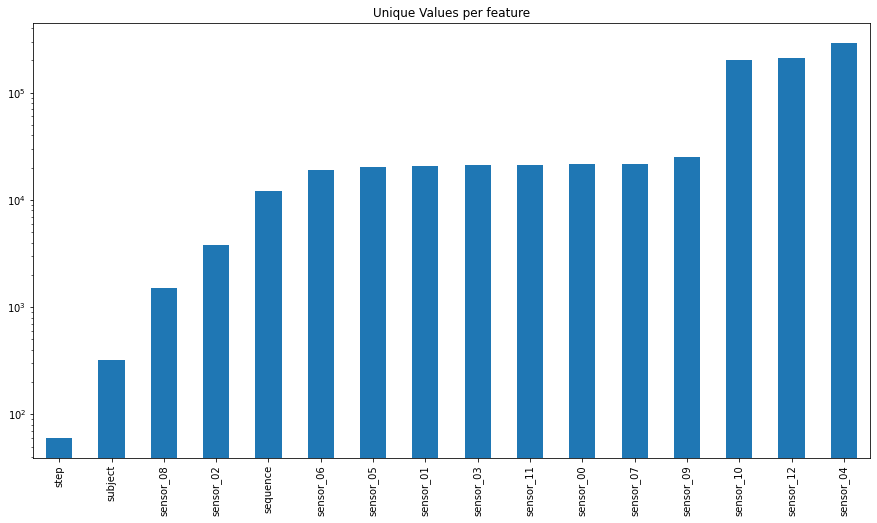

In [24]:
unique_values = test_df.select_dtypes(include='number').nunique().sort_values()

unique_values.plot.bar(logy=True, figsize=(15, 8), title='Unique Values per feature')

# 1.3. Conclusion of structure investigation

The dataset being explored has 16 features to deal with and a lot of samples roughly 1mi without any missing value. There are 3 features of type int64 and 13 of type float64. 

<h2>2. Quality Investigation</h2>

<h3>2.1. Duplicates</h3>

In [25]:
n_duplicates = test_df.duplicated().sum()
print(f"There are {n_duplicates} duplicates samples.")

There are 0 duplicates samples.


<h3>2.2. Missing values</h3>

In [26]:
missing = test_df.isnull().sum()
print(f"Missing values per feature: {missing}")

Missing values per feature: sequence     0
subject      0
step         0
sensor_00    0
sensor_01    0
sensor_02    0
sensor_03    0
sensor_04    0
sensor_05    0
sensor_06    0
sensor_07    0
sensor_08    0
sensor_09    0
sensor_10    0
sensor_11    0
sensor_12    0
dtype: int64


<h2>3. Content Investigation</h2>

<h3>3.1. Feature distribution</h3>

array([[<AxesSubplot:title={'center':'sequence'}>,
        <AxesSubplot:title={'center':'subject'}>,
        <AxesSubplot:title={'center':'step'}>,
        <AxesSubplot:title={'center':'sensor_00'}>,
        <AxesSubplot:title={'center':'sensor_01'}>],
       [<AxesSubplot:title={'center':'sensor_02'}>,
        <AxesSubplot:title={'center':'sensor_03'}>,
        <AxesSubplot:title={'center':'sensor_04'}>,
        <AxesSubplot:title={'center':'sensor_05'}>,
        <AxesSubplot:title={'center':'sensor_06'}>],
       [<AxesSubplot:title={'center':'sensor_07'}>,
        <AxesSubplot:title={'center':'sensor_08'}>,
        <AxesSubplot:title={'center':'sensor_09'}>,
        <AxesSubplot:title={'center':'sensor_10'}>,
        <AxesSubplot:title={'center':'sensor_11'}>],
       [<AxesSubplot:title={'center':'sensor_12'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

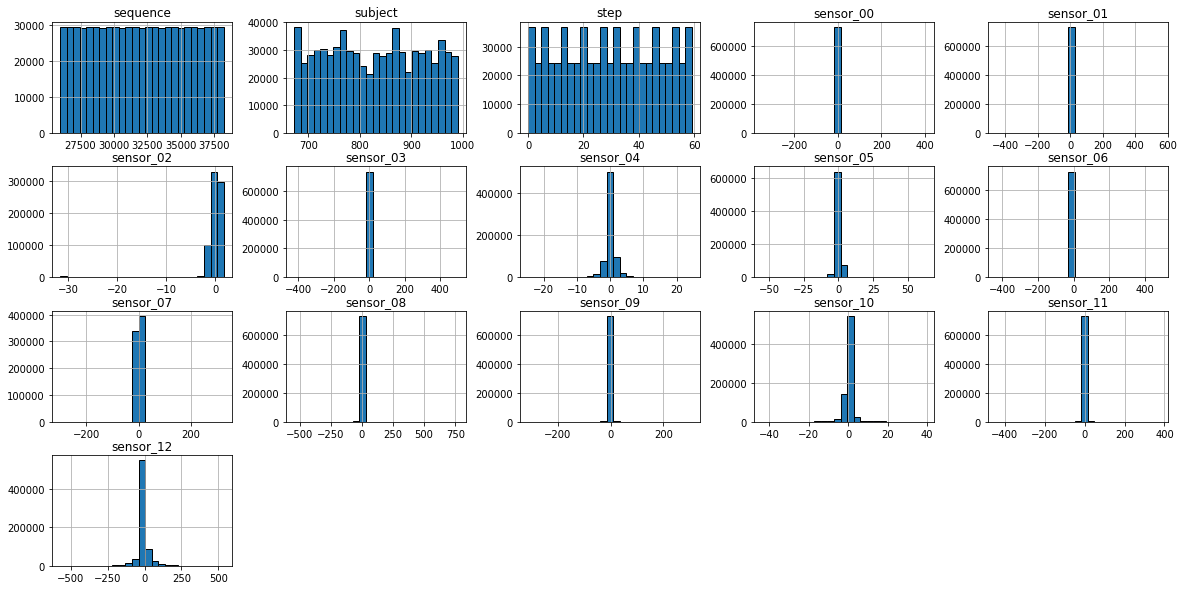

In [27]:
test_df.hist(bins=25, figsize=(20, 10), layout=(-1, 5), edgecolor='black')

<h3>3.2. Feature patterns</h3>

array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

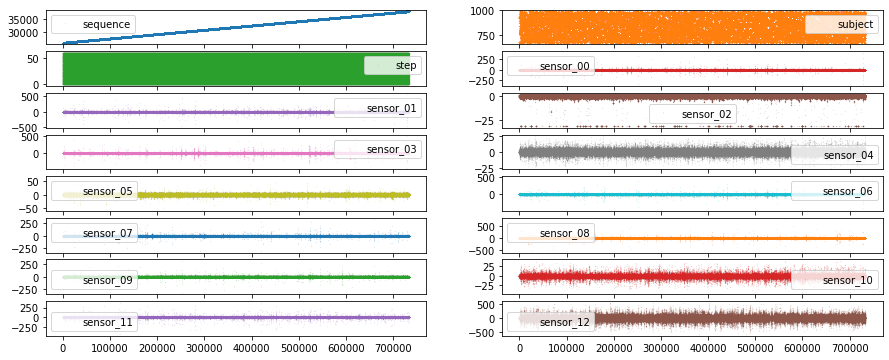

In [28]:
test_df.plot(lw=0, marker=".", subplots=True, layout=(-1, 2), markersize=0.1, figsize=(15, 6))

<h3>3.3. Feature Relationship</h3>

<AxesSubplot:>

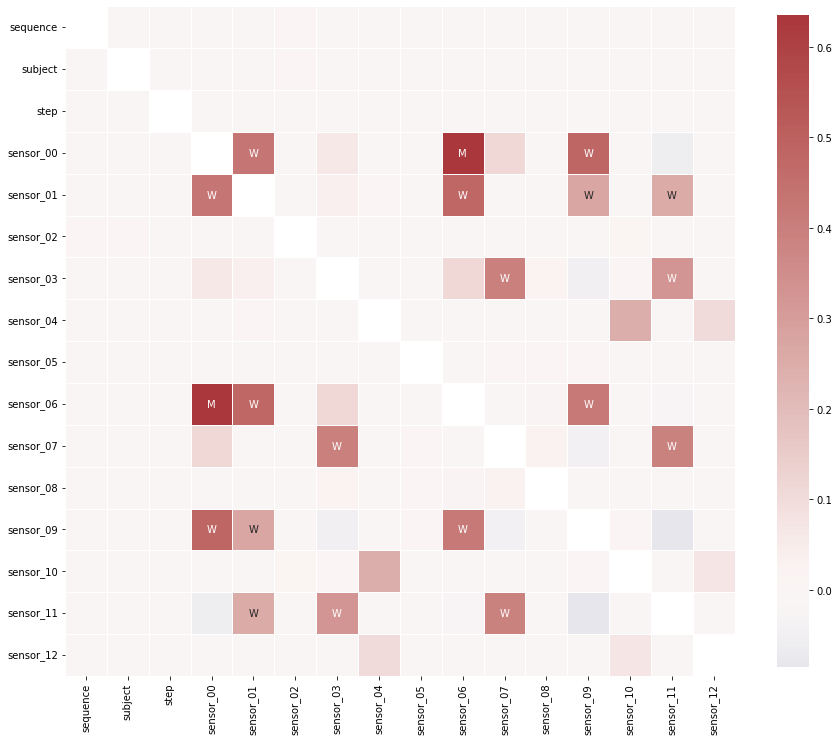

In [29]:
df_corr = test_df.corr(method="pearson")

# Create labels for the correlation matrix
labels = np.where(np.abs(df_corr)>0.75, "S",
                  np.where(np.abs(df_corr)>0.5, "M",
                           np.where(np.abs(df_corr)>0.25, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(15, 15))

sns.heatmap(df_corr, mask=np.eye(len(df_corr)),
            square=True,
            center=0,
            annot=labels,
            fmt='',
            linewidths=0.5,
            cmap="vlag",
            cbar_kws={"shrink": 0.8}
           )

<h3>Conclusion</h3>

There are some features with a lot of outliers and features that are highly correlated. Doing some work on it can improve the results of a predictive model.